In [2]:
import pandas as pd
import os
import numpy as np

# This line is needed to display plots inline in Jupyter Notebook
%matplotlib inline

# Required for basic python plotting functionality
import matplotlib.pyplot as plt

# Required for formatting dates later in the case
import datetime
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# Required to display image inline
from IPython.display import Image

# Advanced plotting functionality with seaborn
import seaborn as sns
sns.set(style="whitegrid") # can set style depending on how you'd like it to look

import folium  #needed for interactive map
from folium.plugins import HeatMap

import branca

import geopandas
from shapely.geometry import Polygon
from shapely.geometry import Point
from geopandas import GeoDataFrame



plotsize = (15,6)


In [3]:
data_g35_1 = pd.read_excel(io = "./MTFF Graphs English.xlsx", sheet_name = "G 3.5.", skiprows = 22, usecols = "B:S", header = 0, nrows = 2)
data_g35_2 = pd.read_excel(io = "./MTFF Graphs English.xlsx", sheet_name = "G 3.5.", skiprows = 27, usecols = "B:S", header = 0, nrows = 2)

data_g35_1.rename({"Year": 'KPI',
                2023 : '2023',
                2024 : '2024',
                2025 : '2025',
                2026 : '2026',
                2027 : '2027',
                2028 : '2028',
                2029 : '2029',
                2030 : '2030',
                2031 : '2031',
                2032 : '2032',
                2033 : '2033',
                2034 : '2034',
                2035 : '2035'}, axis = 1, inplace = True)
data_g35_2.rename({"Year": 'KPI',
                2023 : '2023',
                2024 : '2024',
                2025 : '2025',
                2026 : '2026',
                2027 : '2027',
                2028 : '2028',
                2029 : '2029',
                2030 : '2030',
                2031 : '2031',
                2032 : '2032',
                2033 : '2033',
                2034 : '2034',
                2035 : '2035'}, axis = 1, inplace = True)

print(data_g35_1)
print(data_g35_2)

         KPI  2019  2020  2021  2022  2023  2024  2025  2026  2027  2028  \
0  MTFF 2023   0.4    -5  -3.6    -1   0.0   0.2   0.4   0.2   0.3   0.3   
1   MTFF2024   0.4    -5  -3.6    -1  -0.3  -0.9  -0.5  -0.2   0.2   0.4   

   2029  2030  2031  2032  2033  2034  2035  
0   0.4   0.5   0.5   0.4   0.5   0.5   NaN  
1   0.6   0.8   0.7   0.8   0.7   0.6   0.5  
         KPI  2019  2020  2021  2022  2023  2024  2025  2026  2027  2028  \
0  MTFF 2023  -2.5  -7.8    -7  -5.3  -4.3  -4.4  -3.5  -3.2  -2.9  -2.9   
1  MTFF 2024  -2.5  -7.8    -7  -5.3  -4.3  -5.6  -5.1  -4.3  -3.6  -3.2   

   2029  2030  2031  2032  2033  2034  2035  
0  -2.8  -2.7  -2.8  -2.8  -2.7  -2.6   NaN  
1  -2.9  -2.8  -2.9  -2.9  -2.9  -3.0  -2.9  


In [5]:
data_g35_1_graph = pd.melt(data_g35_1, id_vars = ["KPI"], value_vars = ['2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030', '2031', '2032', '2033', '2034', '2035'], var_name = "Year")
data_g35_1_graph.rename({'value': '% GDP'}, inplace = True, axis = 1)
data_g35_1_graph

data_g35_2_graph = pd.melt(data_g35_2, id_vars = ["KPI"], value_vars = ['2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030', '2031', '2032', '2033', '2034', '2035'], var_name = "Year")
data_g35_2_graph.rename({'value': '% GDP'}, inplace = True, axis = 1)
data_g35_2_graph

,KPI,Year,% GDP
0,MTFF 2023,2023,-4.3
1,MTFF 2024,2023,-4.3
2,MTFF 2023,2024,-4.4
3,MTFF 2024,2024,-5.6
4,MTFF 2023,2025,-3.5
5,MTFF 2024,2025,-5.1
6,MTFF 2023,2026,-3.2
7,MTFF 2024,2026,-4.3
8,MTFF 2023,2027,-2.9
9,MTFF 2024,2027,-3.6


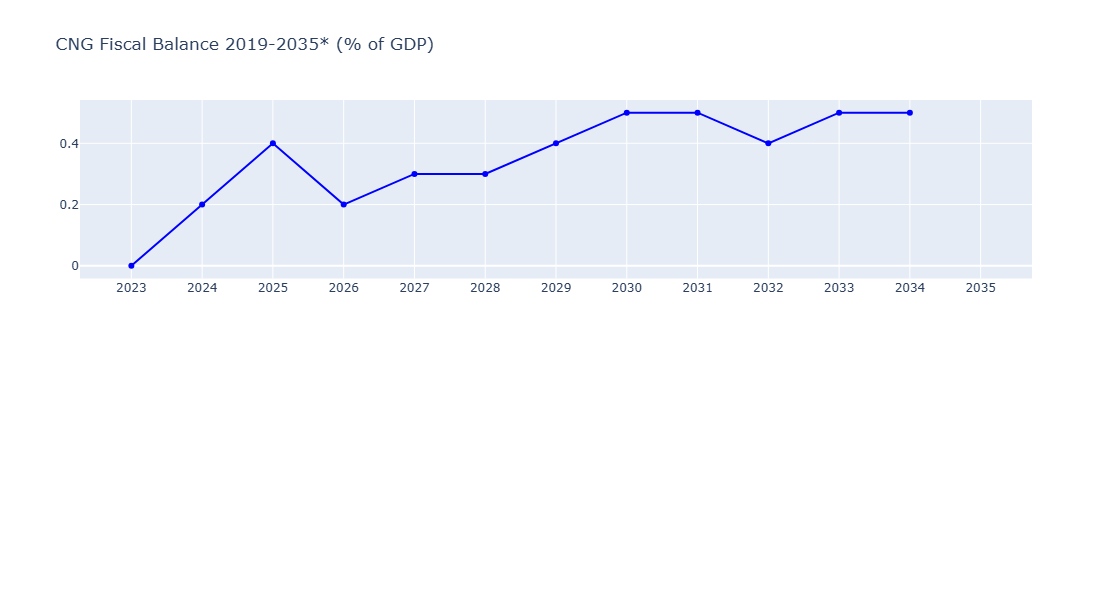

In [17]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)

df_1 = data_g35_1_graph.copy()
df_2 = data_g35_2_graph.copy()

fig = make_subplots(rows=2, cols=1)

fig.add_trace(
    go.Scatter(x=df_1[df_1.KPI == "MTFF 2023"]['Year'], y=df_1[df_1.KPI == "MTFF 2023"]['% GDP'], name="MTFF 2023", marker = {"color": "Blue"}),
    row=1, col=1
)

fig.append_trace(dict(type='scatter',
                                   x=df_1[df_1.KPI == "MTFF 2024"]['Year'],
                                   y=df_1[df_1.KPI == "MTFF 2024"]['% GDP'],
                                   mode='lines',
                      name="MTFF 2024",
                                   line=dict(color='Yellow')),
    
                 1, 1)


fig.update_layout(height=600, width=800, title_text="CNG Fiscal Balance 2019-2035* (% of GDP)")
fig.show()


fig.write_html('./G35.html')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


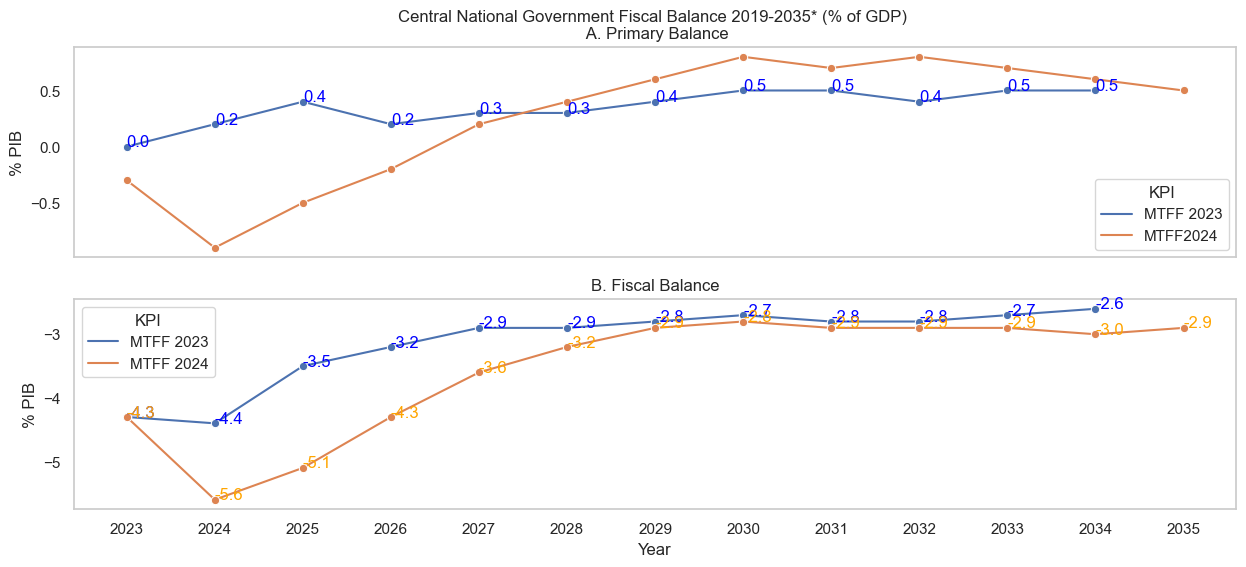

In [19]:
fig, axs = plt.subplots(ncols=1, nrows=2, figsize = plotsize, sharex = True)

# fig, ax = plt.subplots(figsize = plotsize)
line1 = sns.lineplot(x="Year",  y="% GDP", data=data_g35_1_graph, hue = "KPI", ax=axs[0], marker='o', color = ['blue', 'orange'])

df_linea = data_g35_1_graph[data_g35_1_graph.KPI == "MTFF 2023"]

for x, y in zip(df_linea['Year'], df_linea['% GDP']):
     # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
     axs[0].text(x = x, # x-coordinate position of data label
     y = y, # y-coordinate position of data label, adjusted to be 150 below the data point
     s = np.round(y, 1), # data label, formatted to ignore decimals
     color = 'blue') # set colour of line
    
df_linea = data_g35_1_graph[data_g35_1_graph.KPI == "MTFF 2024"]
# label points on the plot
for x, y in zip(df_linea['Year'], df_linea['% GDP']):
     # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
     axs[0].text(x = x, # x-coordinate position of data label
     y = y, # y-coordinate position of data label, adjusted to be 150 below the data point
     s = np.round(y, 1), # data label, formatted to ignore decimals
     color = 'orange') # set colour of line

axs[0].set(xlabel="Year", ylabel="% PIB", title = "Central National Government Fiscal Balance 2019-2035* (% of GDP) \n A. Primary Balance")

line2 = sns.lineplot(x="Year",  y="% GDP", data=data_g35_2_graph, hue = "KPI", ax=axs[1], marker='o', color = ['blue', 'orange'])

df_linea = data_g35_2_graph[data_g35_2_graph.KPI == "MTFF 2023"]

for x, y in zip(df_linea['Year'], df_linea['% GDP']):
     # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
     axs[1].text(x = x, # x-coordinate position of data label
     y = y, # y-coordinate position of data label, adjusted to be 150 below the data point
     s = np.round(y, 1), # data label, formatted to ignore decimals
     color = 'blue') # set colour of line
    
df_linea = data_g35_2_graph[data_g35_2_graph.KPI == "MTFF 2024"]
# label points on the plot
for x, y in zip(df_linea['Year'], df_linea['% GDP']):
     # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
     axs[1].text(x = x, # x-coordinate position of data label
     y = y, # y-coordinate position of data label, adjusted to be 150 below the data point
     s = np.round(y, 1), # data label, formatted to ignore decimals
     color = 'orange') # set colour of line

axs[1].set(xlabel="Year", ylabel="% PIB", title = "B. Fiscal Balance")

axs[0].grid(False)
axs[1].grid(False)